<a href="https://colab.research.google.com/github/ritwiks9635/Object_Recognition_And_Detection-/blob/main/SignLanguageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sign Language Detection**

In [1]:
#https://www.kaggle.com/datasets/datamunge/sign-language-mnist

In [ ]:
!unzip /content/https:/www.kaggle.com/datasets/datamunge/sign-language-mnist/sign-language-mnist.zip

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
train_df = pd.read_csv("/content/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/content/sign_mnist_test/sign_mnist_test.csv")


train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
train_df["label"].value_counts()
y = test_df["label"]

In [7]:
y_train = train_df["label"]
y_test = test_df["label"]

del train_df["label"]
del test_df["label"]

In [8]:
train_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [9]:
x_train = train_df.values
x_test = test_df.values

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train[1].shape

(28, 28, 1)

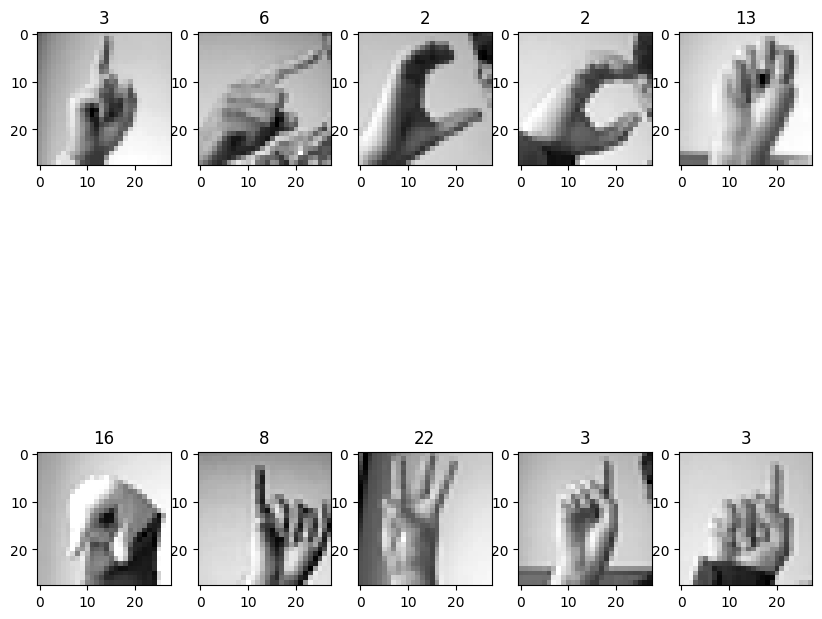

In [10]:
f, ax = plt.subplots(2, 5, figsize = (10, 10))
k = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(x_train[k], cmap = "gray")
        ax[i, j].title.set_text(str(y_train[k]))
        k += 1


plt.show()

In [11]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

print(y_train[1])

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [13]:
model = keras.Sequential(
    [
        layers.Conv2D(75, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides = 2, padding = "same"),
        layers.Conv2D(50, (3, 3), strides = 1, padding = "same", activation = "relu"),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides = 2, padding = "same"),
        layers.Conv2D(25, (3, 3), strides = 1, padding = "same", activation = "relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), strides = 2, padding = "same"),
        layers.Flatten(),
        layers.Dense(512, activation = "relu"),
        layers.Dropout(0.3),
        layers.Dense(24, activation = "softmax")
    ])

In [14]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

In [15]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", patience = 2, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [16]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = 128), epochs = 50, validation_data = (x_test, y_test), callbacks = [reduce_lr])

Epoch 1/50
215/215 [==============================] - 27s 70ms/step - loss: 1.0766 - accuracy: 0.6611 - val_loss: 3.6633 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 2/50
215/215 [==============================] - 10s 47ms/step - loss: 0.2268 - accuracy: 0.9263 - val_loss: 1.6042 - val_accuracy: 0.5374 - lr: 0.0010
Epoch 3/50
215/215 [==============================] - 11s 53ms/step - loss: 0.1118 - accuracy: 0.9630 - val_loss: 0.0848 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 4/50
215/215 [==============================] - 11s 52ms/step - loss: 0.0698 - accuracy: 0.9780 - val_loss: 0.4759 - val_accuracy: 0.8472 - lr: 0.0010
Epoch 5/50
215/215 [==============================] - 11s 51ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0135 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 6/50
215/215 [==============================] - 10s 48ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.3042 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 7/50
215/215 [==============================] - ETA:

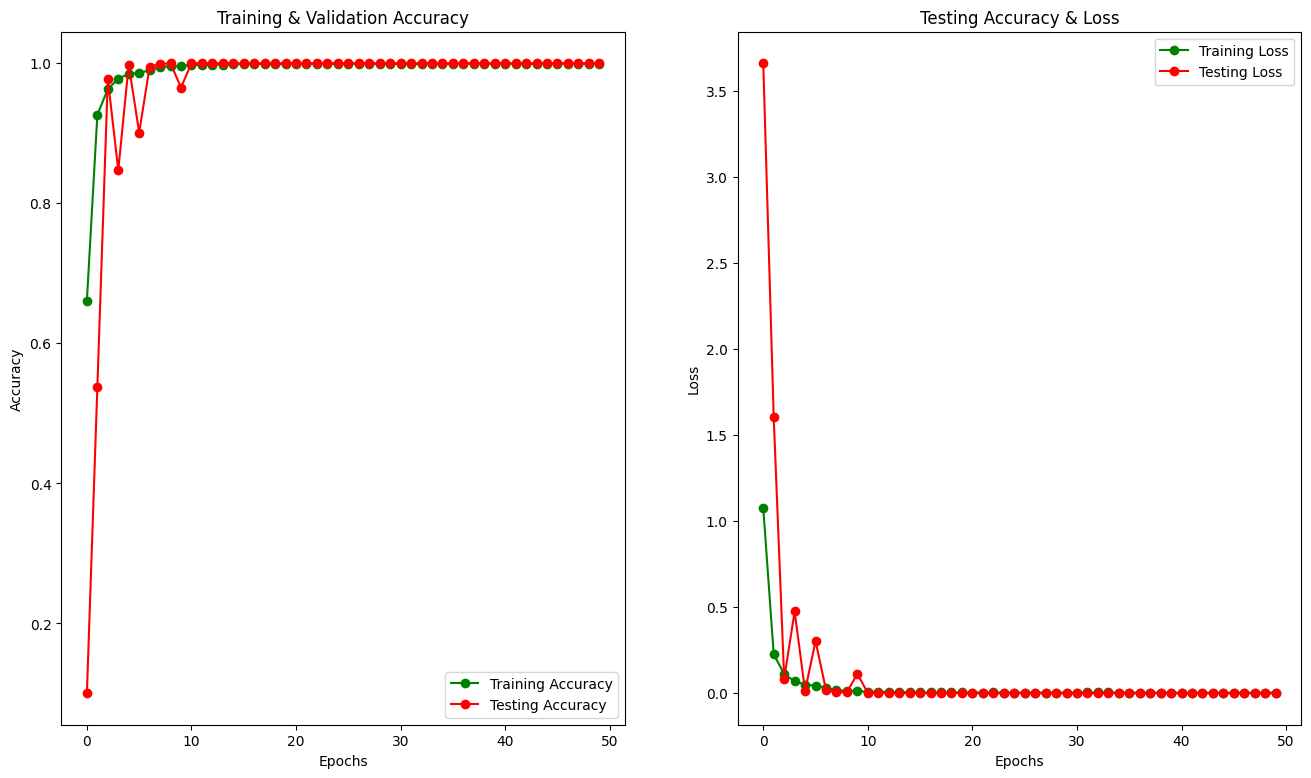

In [17]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [18]:
predictions = model.predict(x_test)

225/225 [==============================] - 1s 2ms/step


In [21]:
pred = np.argmax(predictions, axis = 1)
pred[:5]

array([6, 5, 9, 0, 3])

In [23]:
correct = np.nonzero(pred == y)[0]

In [30]:
non_correct = np.nonzero(pred != y)[0]

<ipython-input-29-e8f7657f85a8>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,i+1)


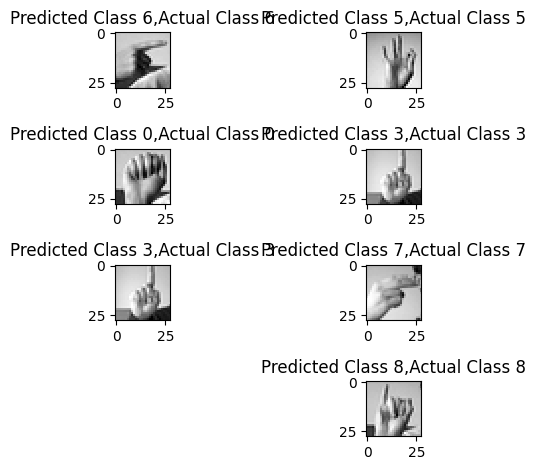

In [29]:
i = 0
for c in correct[:8]:
    plt.subplot(4,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(pred[c], y[c]))
    plt.tight_layout()
    i += 1

<ipython-input-38-268a630ae7b4>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


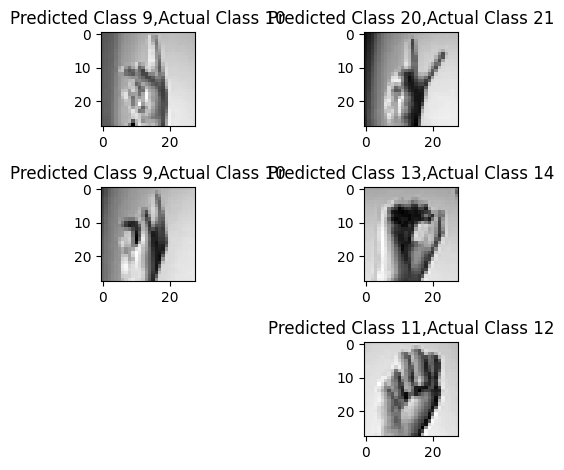

In [38]:
i = 0
for c in non_correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(pred[c], y[c]))
    plt.tight_layout()
    i += 1